# Lecture 4 Model optimalisation


This week we'll dive deeper in some other algorithms/models (RandomForest and XGBoost). Secondly, we'll talk about hyperparameter tuning and how we can find the optimal hyperparameters for a model. We will visualize these result nicely. Lastly, we want to see if we can do some Pandas Profiling. 

This week we will use the Telco Churn prediction dataset (again). Make sure that you have the dataset available somewhere. If you don't, you can find the data [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)


### let's start
First we will load the data and look at classifying if a customer will churn or not. For this, we will do an implementation of a Random Forest and a XGBoost model. 

In [2]:
import pandas as pd 
## start coding here
# change the .. to the path of your .csv file
churn_data = pd.read_csv('..')
## end coding here
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Pandas profiling

Instead of our 'normal' EDA what we have done the last weeks, let's try using ydata profiling [package](https://github.com/ydataai/ydata-profiling). This package enables you to do a 'one line' EDA. Let's check it out below. If you want to read more, [here](https://docs.profiling.ydata.ai/4.6/) are the docs. Make sure that you have installed the package through `pip install ydata-profiling`. It can take some time before you see the result, so please 

In [2]:
from ydata_profiling import ProfileReport
profile = ProfileReport(churn_data, title="Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

As you can see above, you can navigate through the data on different tabs. We go along the tabs and introduce quickly what you can check out. 
- Overview: Quick overview over the full dataset, see the no. of variables, types, missing values and duplicates. As you can see, this data is *very* clean. 
- Variables: This is the page where you can see all the individual variables and get an overview of the balance, a wordcloud with string values, etc. 
- Interactions: the interactions between two variables
- Correlation: the correlation between two variables over all the variables. More blue is more correlated, more red is more negatively correlated. 
- Missing values: Shows you where you have missing values. This dataset has no missing values so there is nothing to see here. 
- Sample: a `head()` function where you get a quick overview of the data. 

## preparing the dataset
For prediction, do some preparation of the dataset. Drop the customerID and Let's create a train test split. We'll then create the Random Forest classifier and train the model with the standard parameters. 

In [37]:
from sklearn.preprocessing import LabelEncoder

df = churn_data.copy()
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
print(df['Churn'].head())

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


In [55]:
# encode the categorical columns to encoded ones
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])


# totalcharges are strings and some are empty. These are rows without a payment. Drop those
if df['TotalCharges'].dtype != 'float64':
    df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '0')
    df['TotalCharges'] = df['TotalCharges'].astype(float)
    df = df[df['TotalCharges'] != 0 ]

There are 3 columns which have to be done yet. Can you spot which ones? If not, i'll give you the names of the columns here: Contract, PaperlessBilling and PaymentMethod. Use the `le.fit_transform` function just like we did above here. 

In [ ]:
### start coding here
df['..'] = le.fit_transform(df['..'])
df['..'] = le.fit_transform(df['..'])
df['..'] = le.fit_transform(df['..'])
### end coding here 

In [56]:
from sklearn.model_selection import train_test_split

y = df['Churn']
X = df.drop(['Churn', 'customerID'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
                                                X, y, test_size=0.33, random_state=42)

For the first model, we use the Random Forest algorithm. You can find the documentation of this algorithm [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [70]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

Now that we've trained the model, check out what our accuracy is.

In [71]:
from sklearn.metrics import accuracy_score
# predict the scores based on the test data
y_pred = clf.predict(X_test)

#compute the accuracy score by comparing the y_test results with the predicted results.
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7811288237828522

To dive a little deeper in the accuracy of the model, i'd like to see what kind of errors (type I or type II) the model makes. We add a confusion matrix below to display the true and false positives and the true and false negatives. 

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

Let's investigate the feature importances of the model.

In [ ]:
import numpy as np
feature_importances = clf.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(feature_importances)[::-1]

# Get the feature names based on the sorted indices
feature_names = [X.columns[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

When we look at the table, we see from left to right the features that have the most influence on the model's prediction. As you can see, the Contract feature contributes the most to classifying. 

Pretty good for our first run! We haven't touched any of the hyperparameters, which we can tune to get even better performance. Let's check how we can make this better through changing some hyperparameters and how you can do it yourself. We use the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) functionality from sci-kit learn to find the best hyperparameter setting. 

In [63]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 10, 20, 30],
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [74]:
print(grid_search.best_params_)
best_model = grid_search.best_estimator_
# see how it stacks up against the first model
y_pred = best_model.predict(X_test)

#compute the accuracy score by comparing the y_test results with the predicted results.
best_model_accuracy = accuracy_score(y_test, y_pred)

print(f"the first model had an accuracy of {accuracy}")
print(f"the best model has an accuracy of {best_model_accuracy}")


{'max_depth': 10, 'n_estimators': 200}
the first model had an accuracy of 0.7811288237828522
the best model has an accuracy of 0.8000861697544162


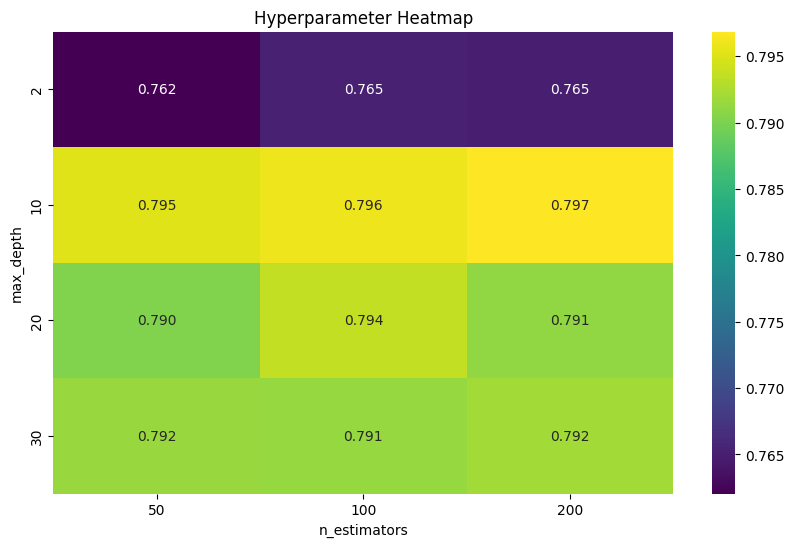

In [79]:
import seaborn as sns

# Access the results and convert them into a DataFrame
results = grid_search.cv_results_
results_df = pd.DataFrame(results)

# Pivot the DataFrame to create a heatmap
pivot_table = results_df.pivot_table(values='mean_test_score', index='param_max_depth', columns='param_n_estimators')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='viridis')
plt.title('Hyperparameter Heatmap')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

Now we have done it with a random forest, time to use XGBoost. And we're not gonna show you, you are going to do it yourself. We help you with the annotations but you will code the parts yourself. If you don't know, take a look in the RandomForest section, because they are eerily similar! Good luck!

Make sure that you've installed the xgboost package through `pip install xgboost`. See the [getting started](https://xgboost.readthedocs.io/en/stable/get_started.html) page to see how you can use the model. 

In [80]:
from xgboost import XGBClassifier

# start coding here

#create a XGBClassifier
XGB_clf = ..()
# fit the model to the train data
XGB_clf.fit(.., ..) 
# end coding here

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [81]:
# predict the scores based on the test data

# start coding here
y_pred = XGB_clf.predict(..)

#compute the accuracy score by comparing the y_test results with the predicted results.
accuracy = accuracy_score(.., ..)

#print the score of the accuracy here
accuracy
# end coding here

0.7781128823782852

To dive a little deeper in the accuracy of the model, i'd like to see what kind of errors (type I or type II) the model makes. We add a confusion matrix below to display the true and false positives and the true and false negatives. Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for hints on how to use the `confusion_matrix` function correctly, or look back for the random forest impelementation. 

In [1]:
from sklearn.metrics import confusion_matrix

# start coding here
confusion = confusion_matrix(.., ..)

sns.heatmap(.., annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# end coding here
plt.title('Confusion Matrix')
plt.show()

SyntaxError: invalid syntax (50972045.py, line 4)

Let's investigate the feature importances of the model.

In [ ]:
feature_importances = XGB_clf.feature_importances_

#start coding here
# Get the indices of the features sorted by importance
indices = np.argsort(...)[::-1]

# Get the feature names based on the sorted indices
feature_names = [X.columns[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), ...[indices], align="center")
plt.xticks(range(X.shape[1]), ..., rotation=90)

#end coding here coding here
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

Again some okay scores out of the box! Please check the documentation on all the [parameters](https://xgboost.readthedocs.io/en/stable/parameter.html) that are available in xgboost. Let's do some hyperparameter tuning just like we did for the random forest. 

In [82]:
# start coding here
# create a new XGBoost classifier
XGB_clf = ..
# set the param_grid. You can use the same parameters but you can change it up if you want
param_grid = {
    '..': [50, 100, 200],
    '..': [2, 10, 20, 30],
}
# Set up the grid search
grid_search = GridSearchCV(estimator=.., param_grid=.., scoring='accuracy')
# fit the grid search
grid_search.fit(.., ..)
# end coding here

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [2, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [83]:
# start coding here
# print the best_params_ from the grid_search object
print(grid_search...)
# get the best model from the grid_search object
best_model = grid_search...
# predict the churn values using the best model on the test set
y_pred = best_model.predict(..)

#compute the accuracy score by comparing the y_test results with the predicted results.
best_model_accuracy = accuracy_score(.., ..)

print(f"the first model had an accuracy of {..}")
print(f"the best model has an accuracy of {..}")
# end coding here

{'max_depth': 2, 'n_estimators': 50}
the first model had an accuracy of 0.7781128823782852
the best model has an accuracy of 0.8026712623869022


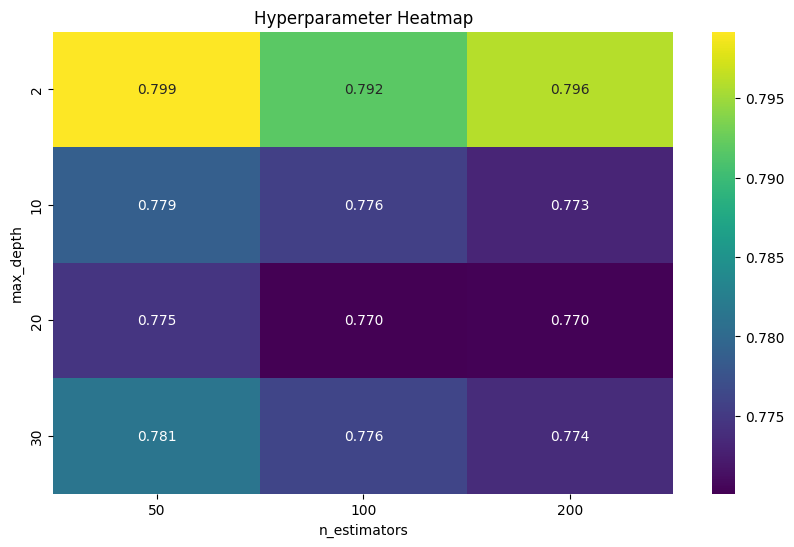

In [84]:
import seaborn as sns

# Access the results and convert them into a DataFrame
results = grid_search.cv_results_
results_df = pd.DataFrame(results)

# Pivot the DataFrame to create a heatmap
pivot_table = results_df.pivot_table(values='mean_test_score', index='param_max_depth', columns='param_n_estimators')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='viridis')
plt.title('Hyperparameter Heatmap')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

Well done! You've just found the best XGBoost classifier yourself!

### Recap
We've done some EDA using the ydata profiling. Takes a little time but creates some very nice insights into your dataset with only 1(!) line of code. 
After we've pre-processed our Churn prediction dataset we used new classifiers with the Random Forest and the XGboost algorithm.
Lastly we've done some hyperparameter tuning by finding the best hyperparameters through so-called grid-search. 


## Homework

Classification can be done on many datasets. For the homework we've selected the [mushroom dataset](https://www.kaggle.com/datasets/uciml/mushroom-classification). This is a clean dataset that needs the same pre-processing as our churn prediction dataset. 

### Questions

1. Load the dataset and use the ydata-profiler to see what the dataset looks like? What do you see and can you see some interesting 'data-stories'? For extra information about the dataset, be sure to check the kaggle page where you've downloaded the dataset and read up on what the dataset is about. Also see what the columns/data in columns mean to create a better understanding. 

2. Start pre-processing the dataset using the categorical encoder. Also make sure that you select the right column that you want to predict ('class'). 

3. When ready, get a random forest of XGBoost classifier and train it on the data. What are your first results? Which hyperparameters can you choose from to tune your model further? Checkout the [Random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) or the [XGBoost](https://xgboost.readthedocs.io/en/stable/parameter.html) for some inspiration. 

4. BONUS: do a grid search with your own chosen hyperparameters and see what the best set of hyperparameters is. in the `param_grid` you can add more than two hyperparameters, so your set can get really big. 

Good luck!